In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
from pymongo import MongoClient
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering

In [2]:
db_name = "Processed_Thrifty_Database"
host = "capstone-cosmos-db.mongo.cosmos.azure.com"
port = 10255
username = "capstone-cosmos-db"
password = "BuYmUjcc9LwFDN2PdVNuUudZTG5ABlxPoZgdIoRlrugcfiF5Rm15REQOJL1dspgH28NeeJI5dOeMCwzqRRrCvg=="
args = "ssl=true&retrywrites=false&ssl_cert_reqs=CERT_NONE"

In [3]:
connection_uri = f"mongodb://{username}:{password}@{host}:{port}/{db_name}?{args}"
client = MongoClient(connection_uri)
 
db = client[db_name]
collection = db['Thrifty_Aggregated']

In [4]:
data= pd.DataFrame(list(collection.find()))
data.head()

,_id,Customer_Id,Name,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,60acfa08a261274b78a77ff5,0,Bertha Weinhold-Kade,0,0,94.0,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0
1,60acfa08a261274b78a77ff6,1,Ewald Käster-Ditschlerin,0,0,82.0,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0
2,60acfa08a261274b78a77ff7,2,Egbert Radisch-Hänel,0,0,32.0,143,12,101,125,146,120,163,102,117,134,80,111,82,152,126,134,131,91,153,126,82,121,110,1189.0,28.0,78.0,102.0,70.0,48.0,35.0,97.0,72.0,56.0,75.0,76.0,37.0,105.0,47.0,68.0,62.0,48.0,35.0,65.0,72.0,42.0,480,445,368,306,466,442,2.96,0.0,290.0,630.0,0.0,2250.0,285860.0,0.0,810.0,0.0,2055.0
3,60acfa08a261274b78a77ff8,3,Ing. Veronika Seidel,0,0,86.0,322,15,186,82,115,107,130,84,163,94,144,79,91,117,88,116,115,121,109,94,156,103,95,1191.0,114.0,60.0,52.0,85.0,43.0,64.0,62.0,45.0,37.0,75.0,44.0,48.0,50.0,36.0,30.0,41.0,57.0,83.0,51.0,45.0,76.0,448,385,374,443,362,377,3.12,0.0,0.0,200.0,0.0,0.0,265905.0,740.0,700.0,430.0,540.0
4,60acfa08a261274b78a77ff9,4,Franz Reichmann,1,0,50.0,77,1,68,118,150,107,120,113,97,149,160,111,141,93,106,90,71,135,84,101,93,119,91,1175.0,50.0,45.0,73.0,38.0,50.0,34.0,30.0,84.0,96.0,47.0,24.0,45.0,53.0,44.0,63.0,84.0,61.0,30.0,58.0,68.0,65.0,344,358,381,440,315,479,2.92,0.0,315.0,1960.0,1590.0,15.0,286615.0,865.0,700.0,115.0,2500.0


In [5]:
data.columns

Index(['_id', 'Customer_Id', 'Name', 'Gender', 'Recency', 'Current_Age',
       'Town', 'State', 'Hoodies', 'bags', 'bathrobe', 'blazer', 'blouse',
       'boots', 'cap', 'cardigan', 'coat', 'dresses', 'gym gear', 'jean',
       'pamajas', 'rubbers', 'sandals', 'shirt', 'shorts', 'sneaker', 'socks',
       'suits', 'swim wear', 'online', 'showroom_0', 'showroom_1',
       'showroom_10', 'showroom_11', 'showroom_12', 'showroom_13',
       'showroom_14', 'showroom_15', 'showroom_16', 'showroom_17',
       'showroom_18', 'showroom_19', 'showroom_2', 'showroom_20', 'showroom_3',
       'showroom_4', 'showroom_5', 'showroom_6', 'showroom_7', 'showroom_8',
       'showroom_9', 'customer', 'instagram', 'referral', 'twitter',
       'referral_unknown', 'website', 'Customer_Ratings',
       'Christi Himmelfahrt', 'Erster Mai', 'Erster Weihnachtstag',
       'Karfreitag', 'Neujahr', 'Not_Holiday', 'Ostermontag', 'Pfingstmontag',
       'Tag der Deutschen Einheit', 'Zweiter Weihnachtstag'],
     

In [6]:
data.shape

(2240, 68)

In [7]:
#data.info()

In [8]:
#df=data['Gender'] = data.Gender.astype('category')
#df

In [9]:
data.head(2)

,_id,Customer_Id,Name,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,60acfa08a261274b78a77ff5,0,Bertha Weinhold-Kade,0,0,94.0,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0
1,60acfa08a261274b78a77ff6,1,Ewald Käster-Ditschlerin,0,0,82.0,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0


In [10]:
data_df = data.drop(['Name', '_id'], axis=1)
data_df.head()

,Customer_Id,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,0,0,0,94.0,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0
1,1,0,0,82.0,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0
2,2,0,0,32.0,143,12,101,125,146,120,163,102,117,134,80,111,82,152,126,134,131,91,153,126,82,121,110,1189.0,28.0,78.0,102.0,70.0,48.0,35.0,97.0,72.0,56.0,75.0,76.0,37.0,105.0,47.0,68.0,62.0,48.0,35.0,65.0,72.0,42.0,480,445,368,306,466,442,2.96,0.0,290.0,630.0,0.0,2250.0,285860.0,0.0,810.0,0.0,2055.0
3,3,0,0,86.0,322,15,186,82,115,107,130,84,163,94,144,79,91,117,88,116,115,121,109,94,156,103,95,1191.0,114.0,60.0,52.0,85.0,43.0,64.0,62.0,45.0,37.0,75.0,44.0,48.0,50.0,36.0,30.0,41.0,57.0,83.0,51.0,45.0,76.0,448,385,374,443,362,377,3.12,0.0,0.0,200.0,0.0,0.0,265905.0,740.0,700.0,430.0,540.0
4,4,1,0,50.0,77,1,68,118,150,107,120,113,97,149,160,111,141,93,106,90,71,135,84,101,93,119,91,1175.0,50.0,45.0,73.0,38.0,50.0,34.0,30.0,84.0,96.0,47.0,24.0,45.0,53.0,44.0,63.0,84.0,61.0,30.0,58.0,68.0,65.0,344,358,381,440,315,479,2.92,0.0,315.0,1960.0,1590.0,15.0,286615.0,865.0,700.0,115.0,2500.0


In [11]:
data_df.shape

(2240, 66)

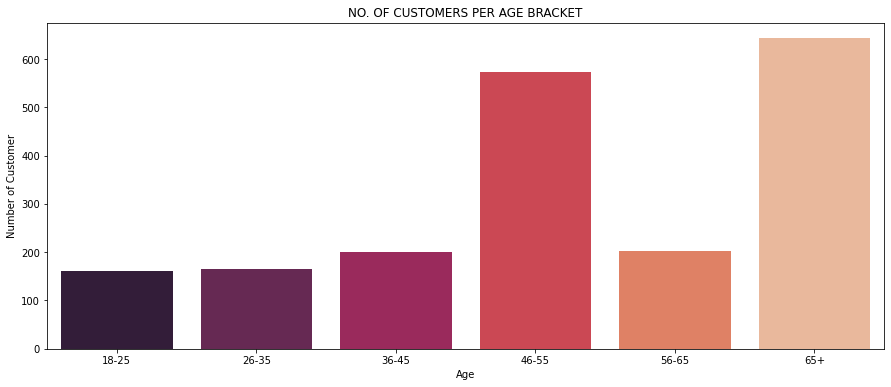

In [12]:
# check the distribution of number of customers in each age group

age18_25 = data_df.Current_Age[(data.Current_Age <= 25) & (data_df.Current_Age >= 18)]
age26_35 = data_df.Current_Age[(data.Current_Age <= 35) & (data_df.Current_Age >= 26)]
age36_45 = data_df.Current_Age[(data.Current_Age <= 45) & (data_df.Current_Age >= 36)]
age46_55 = data_df.Current_Age[(data.Current_Age <= 55) & (data_df.Current_Age>= 46)]
age56_65 = data_df.Current_Age[(data.Current_Age <= 65) & (data_df.Current_Age>= 56)]
age65above = data_df.Current_Age[data.Current_Age >= 66]

x = ["18-25","26-35","36-45","46-55","56-65","65+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_65.values),len(age65above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("NO. OF CUSTOMERS PER AGE BRACKET")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

#Normalization & PCA

In [13]:
##we will apply the standard scaler to scale our data
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

In [14]:
## Standardize the data
data_df_normal = StandardScaler().fit_transform(data_df)
data_df_normal

array([[-1.73127774, -1.00268217, -1.69600071, ..., -0.58812566,
        -0.17302077, -0.82369244],
       [-1.72973127, -1.00268217, -1.69600071, ..., -0.82133439,
         1.10223925, -0.6674642 ],
       [-1.72818479, -1.00268217, -1.69600071, ...,  0.05726591,
        -0.81600902,  1.31663436],
       ...,
       [ 1.72818479,  0.99732501,  1.72298132, ..., -0.82133439,
         0.46996748,  0.82191162],
       [ 1.72973127,  0.99732501,  1.72298132, ..., -0.82133439,
        -0.52666431, -0.82369244],
       [ 1.73127774, -1.00268217,  1.72298132, ..., -0.25729469,
         2.30248398,  2.30087223]])

In [15]:
#Dimension reduction
from sklearn.decomposition import PCA

In [16]:
##we use PCA to reduce the number down to be interpretable.#
pca = PCA()
cluster_df= pca.fit_transform(data_df_normal)

In [17]:
cluster_df.shape

(2240, 66)

In [18]:
pca.explained_variance_

array([3.73364993e+00, 2.05961570e+00, 1.38835325e+00, 1.31058427e+00,
       1.28717150e+00, 1.27521513e+00, 1.26931702e+00, 1.24492419e+00,
       1.23890419e+00, 1.23258164e+00, 1.20937004e+00, 1.20285444e+00,
       1.18407804e+00, 1.17096758e+00, 1.15436438e+00, 1.15083948e+00,
       1.13465489e+00, 1.12417468e+00, 1.12117751e+00, 1.10505493e+00,
       1.10015889e+00, 1.07999670e+00, 1.07695672e+00, 1.06796702e+00,
       1.05991057e+00, 1.05922874e+00, 1.04581366e+00, 1.03482148e+00,
       1.02379358e+00, 1.01587084e+00, 1.00887102e+00, 1.00284805e+00,
       9.88179219e-01, 9.84337886e-01, 9.77106583e-01, 9.65929503e-01,
       9.55175372e-01, 9.44166233e-01, 9.39392463e-01, 9.32456021e-01,
       9.23619711e-01, 9.11729844e-01, 9.03038121e-01, 8.99087886e-01,
       8.81922390e-01, 8.78230557e-01, 8.71163084e-01, 8.63983071e-01,
       8.55214584e-01, 8.49668416e-01, 8.38251425e-01, 8.29027861e-01,
       8.23379452e-01, 8.12424722e-01, 7.99605632e-01, 7.87356098e-01,
      

In [19]:
#shows how much variance is explained for every component in our df
pca.explained_variance_ratio_

array([5.65451989e-02, 3.11923670e-02, 2.10262644e-02, 1.98484726e-02,
       1.94938919e-02, 1.93128158e-02, 1.92234903e-02, 1.88540670e-02,
       1.87628956e-02, 1.86671421e-02, 1.83156081e-02, 1.82169311e-02,
       1.79325672e-02, 1.77340126e-02, 1.74825612e-02, 1.74291775e-02,
       1.71840659e-02, 1.70253457e-02, 1.69799543e-02, 1.67357818e-02,
       1.66616325e-02, 1.63562812e-02, 1.63102414e-02, 1.61740947e-02,
       1.60520817e-02, 1.60417557e-02, 1.58385875e-02, 1.56721137e-02,
       1.55050989e-02, 1.53851111e-02, 1.52791005e-02, 1.51878841e-02,
       1.49657283e-02, 1.49075523e-02, 1.47980360e-02, 1.46287619e-02,
       1.44658932e-02, 1.42991626e-02, 1.42268650e-02, 1.41218143e-02,
       1.39879906e-02, 1.38079215e-02, 1.36762876e-02, 1.36164622e-02,
       1.33564951e-02, 1.33005832e-02, 1.31935481e-02, 1.30848085e-02,
       1.29520120e-02, 1.28680167e-02, 1.26951092e-02, 1.25554206e-02,
       1.24698768e-02, 1.23039702e-02, 1.21098283e-02, 1.19243121e-02,
      

In [20]:
len(pca.explained_variance_), sum(pca.explained_variance_ratio_)

(66, 1.0000000000000002)

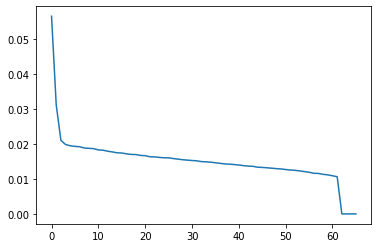

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



Optimal number of clusters based on silhouette score: [2]


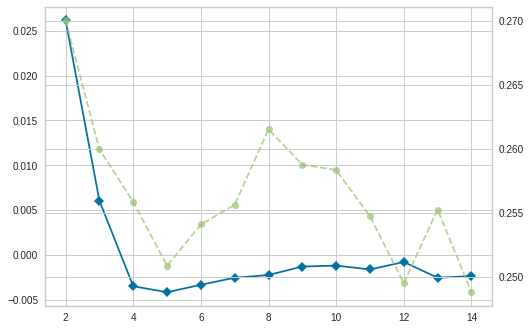

In [22]:
# Silhouette Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer      

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

In [79]:
from sklearn.metrics import davies_bouldin_score

#Hierarchical Clustering

In [24]:
import scipy.cluster.hierarchy as sch

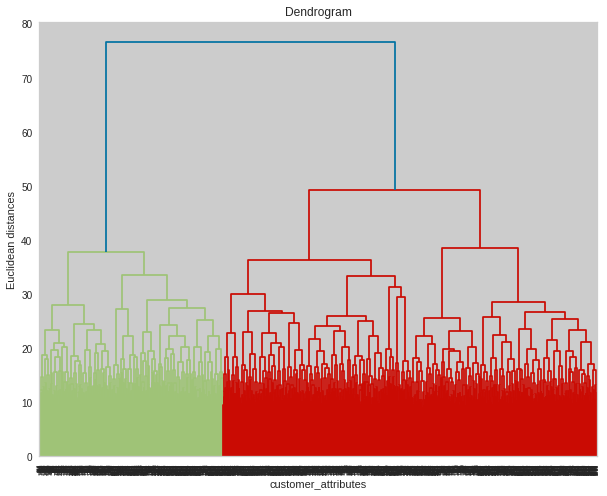

In [25]:
#Ward is a method that tries to minimize the variance within each cluster
#dendrogram
plt.figure(figsize=(10, 8))
dendrogram = sch.dendrogram(sch.linkage(cluster_df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('customer_attributes')
plt.ylabel('Euclidean distances')
plt.show()

In [26]:
#dendogram will give Give a dictionary 
#print(dendrogram)

How do we determine the optimal number of clusters from this diagram?

#2 clusters

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [28]:
y_hc=hc.fit_predict(cluster_df)

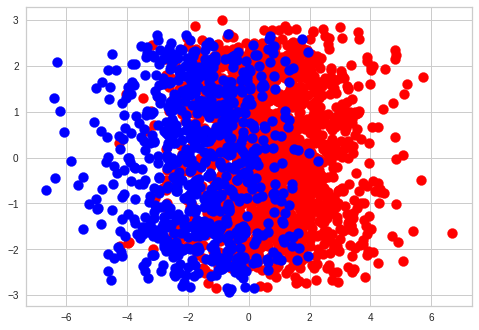

In [29]:
##Visualizing 2 clusters
plt.scatter(cluster_df[y_hc==0, 0], cluster_df[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(cluster_df[y_hc==1, 0], cluster_df[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.show()

In [30]:
#Average of the 2 clusters
results_array = []
for i in range(2):
    results_array.append(data_df[y_hc == i].astype(float).mean())

In [31]:
cluster_avg = pd.concat(results_array, axis=1).transpose()
cluster_avg .head(5)

,Customer_Id,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag
0,1143.418775,0.511318,50.178429,50.944740,199.303595,6.725033,108.986684,108.219041,106.744341,108.876831,110.080559,106.804261,110.173103,107.375499,107.177763,109.927430,106.353529,107.531292,108.049268,106.793609,108.795606,106.471372,109.166445,108.798935,108.842876,106.177763,107.182423,1131.100533,53.866844,53.649800,54.127830,54.457390,54.298269,54.260320,54.427430,54.348868,53.617843,54.555925,54.347537,53.858855,53.537949,53.876165,53.607190,54.511318,54.290280,54.430093,54.406791,54.187750,54.763648,375.063915,378.340213,378.852863,381.033289,376.810253,378.428096,2.999068,833.305593,747.083888,768.708389,694.107856,783.455393,265544.397470,692.493342,734.081225,769.304261,739.017976
1,1070.819783,0.481030,46.933604,50.300813,188.640921,7.319783,112.971545,114.892954,113.352304,115.647696,111.833333,117.928184,111.113821,116.079946,116.384824,114.023035,117.552846,114.574526,115.382114,115.909214,114.701897,117.249322,112.216802,115.567751,114.441734,117.701897,117.607046,1206.699187,57.714092,57.134146,57.447154,56.691057,57.219512,57.688347,56.542005,58.210027,58.323848,59.685637,58.075881,56.777778,59.117886,57.426829,59.718157,56.425474,57.659892,58.120596,56.951220,57.547425,55.956640,404.341463,400.220867,401.613821,401.006775,406.315718,403.634146,3.001545,647.147696,880.311653,786.869919,828.902439,680.860434,285910.941734,859.918699,804.268293,745.474255,896.355014


In [32]:
# Read off 5 the clusters:
hc.set_params(n_clusters=2)
clusters = hc.fit_predict(data_df_normal) 
np.bincount(clusters) # count of data points in each cluster

array([1502,  738])

In [33]:
# Add cluster number to the original data
scaled_clustered = pd.DataFrame(data_df, columns=data_df.columns, index=data_df.index)
scaled_clustered['cluster'] = clusters

scaled_clustered.head(10)

,Customer_Id,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,cluster
0,0,0,0,94.0,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0,0
1,1,0,0,82.0,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0,1
2,2,0,0,32.0,143,12,101,125,146,120,163,102,117,134,80,111,82,152,126,134,131,91,153,126,82,121,110,1189.0,28.0,78.0,102.0,70.0,48.0,35.0,97.0,72.0,56.0,75.0,76.0,37.0,105.0,47.0,68.0,62.0,48.0,35.0,65.0,72.0,42.0,480,445,368,306,466,442,2.96,0.0,290.0,630.0,0.0,2250.0,285860.0,0.0,810.0,0.0,2055.0,1
3,3,0,0,86.0,322,15,186,82,115,107,130,84,163,94,144,79,91,117,88,116,115,121,109,94,156,103,95,1191.0,114.0,60.0,52.0,85.0,43.0,64.0,62.0,45.0,37.0,75.0,44.0,48.0,50.0,36.0,30.0,41.0,57.0,83.0,51.0,45.0,76.0,448,385,374,443,362,377,3.12,0.0,0.0,200.0,0.0,0.0,265905.0,740.0,700.0,430.0,540.0,0
4,4,1,0,50.0,77,1,68,118,150,107,120,113,97,149,160,111,141,93,106,90,71,135,84,101,93,119,91,1175.0,50.0,45.0,73.0,38.0,50.0,34.0,30.0,84.0,96.0,47.0,24.0,45.0,53.0,44.0,63.0,84.0,61.0,30.0,58.0,68.0,65.0,344,358,381,440,315,479,2.92,0.0,315.0,1960.0,1590.0,15.0,286615.0,865.0,700.0,115.0,2500.0,1
5,5,1,0,46.0,167,8,152,117,158,83,140,125,71,127,122,97,112,110,95,181,109,161,119,107,74,89,132,1358.0,72.0,62.0,66.0,67.0,44.0,47.0,43.0,41.0,6.0,63.0,52.0,66.0,50.0,41.0,66.0,32.0,61.0,67.0,71.0,56.0,50.0,300,504,328,511,332,506,2.98,0.0,700.0,400.0,0.0,160.0,287985.0,1285.0,315.0,1000.0,3335.0,1
6,6,0,0,84.0,112,13,121,91,127,110,103,93,177,112,112,77,103,66,111,66,110,89,115,115,154,86,43,1052.0,47.0,62.0,62.0,76.0,77.0,60.0,58.0,37.0,51.0,57.0,68.0,45.0,62.0,55.0,17.0,29.0,43.0,66.0,43.0,41.0,73.0,490,328,321,327,362,353,2.89,0.0,0.0,160.0,2370.0,450.0,242715.0,1980.0,350.0,355.0,0.0,0
7,7,1,0,69.0,102,6,87,99,104,66,130,148,155,121,112,129,125,144,173,128,88,110,78,94,191,89,144,1285.0,28.0,58.0,46.0,42.0,23.0,84.0,35.0,65.0,113.0,79.0,89.0,61.0,34.0,27.0,51.0,44.0,90.0,62.0,47.0,90.0,62.0,506,349,476,440,397,347,2.95,240.0,980.0,920.0,220.0,0.0,284545.0,0.0,720.0,390.0,980.0,1
8,8,1,0,50.0,375,3,117,162,63,147,88,46,101,98,110,98,130,116,112,121,106,103,45,94,146,117,120,1076.0,86.0,73.0,32.0,53.0,39.0,57.0,21.0,57.0,51.0,89.0,30.0,31.0,79.0,64.0,78.0,91.0,60.0,53.0,43.0,54.0,23.0,378,309,421,315,379,438,3.03,1225.0,400.0,895.0,2020.0,500.0,262355.0,3825.0,2450.0,70.0,3825.0,0
9,9,1,0,93.0,89,9,81,96,107,135,126,60,98,84,108,78,78,97,83,90,125,102,116,133,127,115,108,1021.0,62.0,81.0,44.0,15.0,59.0,50.0,78.0,48.0,38.0,58.0,47.0,30.0,28.0,78.0,56.0,60.0,43.0,34.0,80.0,55.0,82.0,391,282,314,399,380,381,3.17,1750.0,0.0,0.0,0.0,960.0,246925.0,0.0,0.0,120.0,560.0,0


In [34]:
scaled_clustered.to_csv('averageGeeks.csv')

#3 clusters

In [35]:
#Fitting hierarchical clustering to the dataset
# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and Divisive Hierarchical Clustering.
# Going with agglomerative
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [36]:
y_hc=hc.fit_predict(cluster_df)

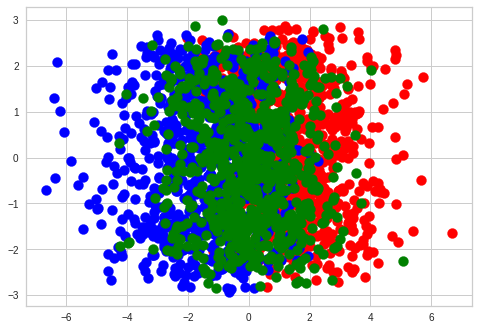

In [37]:
##Visualizing 3 clusters
plt.scatter(cluster_df[y_hc==0, 0], cluster_df[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(cluster_df[y_hc==1, 0], cluster_df[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(cluster_df[y_hc==2, 0], cluster_df[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.show()

In [38]:
#Average of the 3 clusters
results_array = []
for i in range(3):
    results_array.append(data_df[y_hc == i].astype(float).mean())

In [39]:
cluster_avg = pd.concat(results_array, axis=1).transpose()
cluster_avg .head(5)

,Customer_Id,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,cluster
0,1216.055034,0.510067,53.408054,51.683221,187.158389,7.076510,108.010738,102.318121,105.648322,105.536913,104.273826,105.728859,105.571812,107.955705,103.409396,107.818792,101.030872,105.386577,107.344966,105.598658,108.703356,103.983893,108.374497,107.256376,105.488591,103.844295,106.226846,1105.369128,53.838926,51.781208,53.303356,53.488591,54.029530,52.753020,51.508725,51.142282,50.948993,54.017450,52.910067,52.936913,53.846980,53.471141,52.359732,54.012081,54.228188,52.681879,51.506040,55.600000,53.777181,370.332886,370.700671,370.151678,373.730201,366.424161,368.171812,2.997248,723.214765,772.436242,731.550336,594.402685,693.221477,259311.946309,605.624161,713.536913,750.107383,709.046980,0.0
1,1070.819783,0.481030,46.933604,50.300813,188.640921,7.319783,112.971545,114.892954,113.352304,115.647696,111.833333,117.928184,111.113821,116.079946,116.384824,114.023035,117.552846,114.574526,115.382114,115.909214,114.701897,117.249322,112.216802,115.567751,114.441734,117.701897,117.607046,1206.699187,57.714092,57.134146,57.447154,56.691057,57.219512,57.688347,56.542005,58.210027,58.323848,59.685637,58.075881,56.777778,59.117886,57.426829,59.718157,56.425474,57.659892,58.120596,56.951220,57.547425,55.956640,404.341463,400.220867,401.613821,401.006775,406.315718,403.634146,3.001545,647.147696,880.311653,786.869919,828.902439,680.860434,285910.941734,859.918699,804.268293,745.474255,896.355014,1.0
2,1071.933950,0.512550,47.000000,50.217966,211.256275,6.379128,109.947160,114.026420,107.822985,112.163804,115.795244,107.862616,114.701453,106.804491,110.886394,112.002642,111.591810,109.642008,108.742404,107.969617,108.886394,108.919419,109.945839,110.317041,112.143989,108.474240,108.122853,1156.424042,53.894320,55.488771,54.939234,55.410832,54.562748,55.743725,57.299868,57.504624,56.244386,55.085865,55.762219,54.766182,53.233818,54.274769,54.834875,55.002642,54.351387,56.150594,57.261559,52.797886,55.734478,379.719947,385.858653,387.416116,388.220608,387.031704,388.521797,3.000859,941.651255,722.133421,805.277411,792.232497,872.258917,271678.051519,777.985469,754.299868,788.196830,768.513871,0.0


In [40]:
#Average of the 3 clusters
results_array = []
for i in range(3):
    results_array.append(data_df[y_hc == i].astype(float).count())

In [41]:
cluster_avg = pd.concat(results_array, axis=1).transpose()
cluster_avg .head(5)

,Customer_Id,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,cluster
0,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745
1,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738
2,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757,757


#4 Cluster

In [42]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [43]:
X_hc=hc.fit_predict(cluster_df)

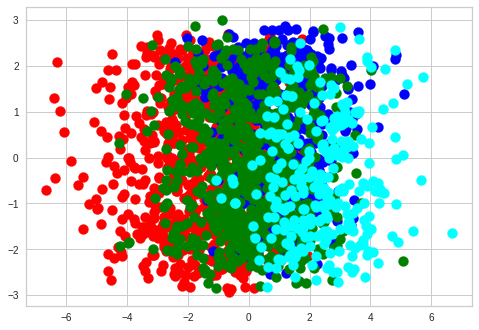

In [44]:
##Visualizing the clusters
plt.scatter(cluster_df[X_hc==0, 0], cluster_df[X_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(cluster_df[X_hc==1, 0], cluster_df[X_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(cluster_df[X_hc==2, 0], cluster_df[X_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(cluster_df[X_hc==3, 0], cluster_df[X_hc==3, 1], s=100, c='cyan', label ='Cluster 4')

#5 CLUSTERS

In [45]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [46]:
X_hc=hc.fit_predict(cluster_df)

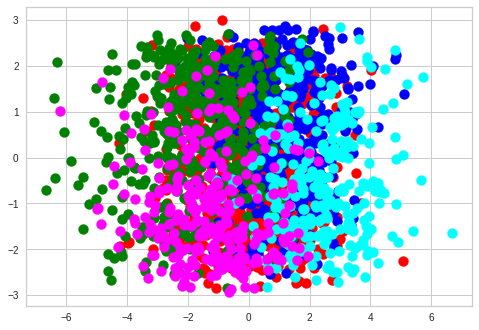

In [47]:
##5 Visualizing the clusters
plt.scatter(cluster_df[X_hc==0, 0], cluster_df[X_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(cluster_df[X_hc==1, 0], cluster_df[X_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(cluster_df[X_hc==2, 0], cluster_df[X_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(cluster_df[X_hc==3, 0], cluster_df[X_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(cluster_df[X_hc==4, 0], cluster_df[X_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.show()

#Studying each cluster individually

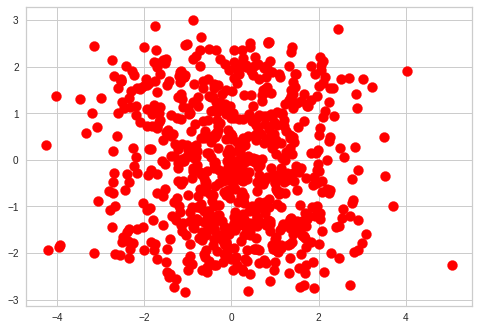

In [48]:
plt.scatter(cluster_df[X_hc==0, 0], cluster_df[X_hc==0, 1], s=100, c='red', label ='Cluster 1')

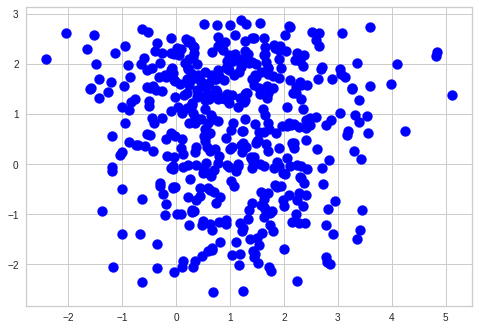

In [49]:
plt.scatter(cluster_df[X_hc==1, 0], cluster_df[X_hc==1, 1], s=100, c='blue', label ='Cluster 2')

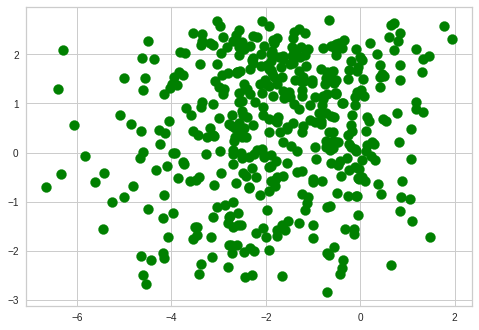

In [50]:
plt.scatter(cluster_df[X_hc==2, 0], cluster_df[X_hc==2, 1], s=100, c='green', label ='Cluster 3')

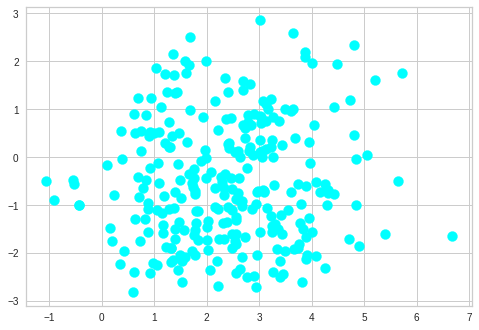

In [51]:
plt.scatter(cluster_df[X_hc==3, 0], cluster_df[X_hc==3, 1], s=100, c='cyan', label ='Cluster 4')

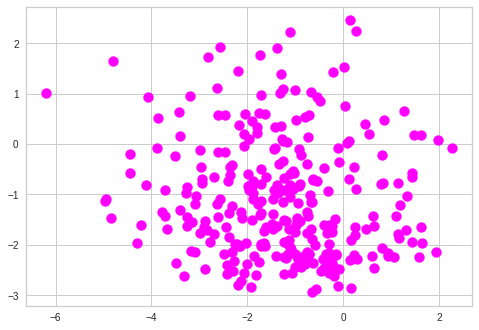

In [52]:
plt.scatter(cluster_df[X_hc==4, 0], cluster_df[X_hc==4, 1], s=100, c='magenta', label ='Cluster 5')

In [53]:
#Average of the 5 clusters
results_array = []
for i in range(5):
    results_array.append(data_df[X_hc == i].astype(float).mean())

In [54]:
cluster_avg = pd.concat(results_array, axis=1).transpose()
cluster_avg .head(5)

,Customer_Id,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,cluster
0,1071.933950,0.512550,47.000000,50.217966,211.256275,6.379128,109.947160,114.026420,107.822985,112.163804,115.795244,107.862616,114.701453,106.804491,110.886394,112.002642,111.591810,109.642008,108.742404,107.969617,108.886394,108.919419,109.945839,110.317041,112.143989,108.474240,108.122853,1156.424042,53.894320,55.488771,54.939234,55.410832,54.562748,55.743725,57.299868,57.504624,56.244386,55.085865,55.762219,54.766182,53.233818,54.274769,54.834875,55.002642,54.351387,56.150594,57.261559,52.797886,55.734478,379.719947,385.858653,387.416116,388.220608,387.031704,388.521797,3.000859,941.651255,722.133421,805.277411,792.232497,872.258917,271678.051519,777.985469,754.299868,788.196830,768.513871,0.0
1,1422.598726,0.524416,62.658174,50.356688,182.303609,6.845011,107.382166,104.970276,107.811040,107.490446,106.951168,104.806794,107.978769,109.764331,103.902335,110.443737,103.220807,106.713376,108.193206,106.925690,109.787686,103.740977,111.602972,109.309979,105.681529,105.927813,108.596603,1123.250531,56.333333,51.685775,54.384289,53.872611,54.842887,51.624204,53.089172,49.358811,51.084926,55.248408,53.626327,53.140127,54.375796,54.993631,53.859873,56.348195,54.855626,53.329087,50.915074,57.380042,53.602972,377.235669,375.545648,380.082803,377.808917,369.233546,371.295117,3.001507,686.592357,872.070064,688.089172,610.509554,688.184713,263328.312102,566.337580,746.581741,717.452229,692.133758,0.0
2,1339.751678,0.505593,58.977629,49.194631,191.102908,7.221477,114.512304,113.789709,115.590604,114.440716,111.964206,116.042506,112.337808,117.751678,116.105145,115.411633,120.143177,114.176734,118.046980,114.982103,111.937360,121.483221,113.847875,115.782998,115.986577,117.850112,118.176734,1211.865772,58.608501,55.762864,57.337808,59.214765,56.812081,59.380313,55.246085,56.919463,57.682327,58.626398,59.487696,57.114094,59.760626,56.995526,60.769575,56.503356,59.194631,59.888143,57.140940,59.791946,56.257271,406.604027,408.055928,402.809843,394.727069,413.677852,404.485459,2.997047,672.259508,794.228188,820.257271,771.722595,681.979866,286823.288591,876.398210,851.554810,724.038031,1051.711409,1.0
3,861.010949,0.485401,37.507299,53.963504,195.503650,7.474453,109.091241,97.759124,101.930657,102.178832,99.671533,107.313869,101.434307,104.846715,102.562044,103.306569,97.266423,103.105839,105.886861,103.317518,106.839416,104.401460,102.824818,103.726277,105.156934,100.262774,102.153285,1074.631387,49.551095,51.945255,51.445255,52.828467,52.631387,54.693431,48.791971,54.208029,50.715328,51.901460,51.678832,52.587591,52.937956,50.854015,49.781022,49.996350,53.149635,51.569343,52.521898,52.540146,54.076642,358.467153,362.372263,353.080292,366.718978,361.594891,362.802920,2.989927,786.167883,601.167883,806.259124,566.715328,701.879562,252407.901460,673.156934,656.733577,806.240876,738.120438,0.0
4,657.718213,0.443299,28.432990,52.000000,184.859107,7.470790,110.604811,116.587629,109.914089,117.501718,111.632302,120.824742,109.233677,113.512027,116.814433,111.890034,113.573883,115.185567,111.288660,117.333333,118.948454,110.745704,109.711340,115.237113,112.068729,117.474227,116.731959,1198.762887,56.340206,59.240550,57.615120,52.814433,57.845361,55.089347,58.532646,60.192440,59.309278,61.312715,55.907216,56.261168,58.130584,58.089347,58.103093,56.305842,55.302405,55.4

In [55]:
# Read off 5 the clusters:
hc.set_params(n_clusters=5)
clusters = hc.fit_predict(data_df_normal) 
np.bincount(clusters) # count of data points in each cluster

array([757, 471, 447, 274, 291])

In [56]:
# Add cluster number to the original data
scaled_clustered = pd.DataFrame(data_df, columns=data_df.columns, index=data_df.index)
scaled_clustered['cluster'] = clusters

scaled_clustered.head(2)

,Customer_Id,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,cluster
0,0,0,0,94.0,223,1,126,108,128,92,122,128,132,130,35,89,105,81,124,103,64,121,95,62,89,171,114,1066.0,80.0,50.0,87.0,47.0,42.0,57.0,72.0,81.0,49.0,57.0,12.0,64.0,42.0,52.0,59.0,53.0,67.0,63.0,41.0,28.0,50.0,391,440,341,294,348,405,2.96,550.0,0.0,1000.0,0.0,0.0,272720.0,500.0,215.0,600.0,0.0,3
1,1,0,0,82.0,375,3,55,93,132,122,127,111,141,131,81,80,136,97,97,166,123,115,97,98,138,130,147,1226.0,41.0,35.0,85.0,76.0,42.0,38.0,64.0,91.0,17.0,35.0,56.0,35.0,70.0,56.0,75.0,48.0,58.0,87.0,82.0,45.0,55.0,406,360,506,433,379,333,3.01,720.0,1250.0,790.0,0.0,0.0,281475.0,0.0,0.0,1790.0,150.0,4


In [57]:
scaled_clustered["cluster"].value_counts()

0    757
1    471
2    447
4    291
3    274
Name: cluster, dtype: int64

In [58]:
# Find the size of the clusters
scaled_clustered["cluster"].value_counts()

0    757
1    471
2    447
4    291
3    274
Name: cluster, dtype: int64

In [59]:
#scaled_clustered.cov()

In [60]:
#scaled_clustered.corr(method="pearson")

In [61]:
#scaled_clustered.to_csv('GeeksforGeeks.csv')

#Interpreting the Meaning of the 5 Clusters

In [62]:
#Cluster 0
customers=scaled_clustered[scaled_clustered.cluster == 0]
customers.head(2)

,Customer_Id,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,cluster
3,3,0,0,86.0,322,15,186,82,115,107,130,84,163,94,144,79,91,117,88,116,115,121,109,94,156,103,95,1191.0,114.0,60.0,52.0,85.0,43.0,64.0,62.0,45.0,37.0,75.0,44.0,48.0,50.0,36.0,30.0,41.0,57.0,83.0,51.0,45.0,76.0,448,385,374,443,362,377,3.12,0.0,0.0,200.0,0.0,0.0,265905.0,740.0,700.0,430.0,540.0,0
8,8,1,0,50.0,375,3,117,162,63,147,88,46,101,98,110,98,130,116,112,121,106,103,45,94,146,117,120,1076.0,86.0,73.0,32.0,53.0,39.0,57.0,21.0,57.0,51.0,89.0,30.0,31.0,79.0,64.0,78.0,91.0,60.0,53.0,43.0,54.0,23.0,378,309,421,315,379,438,3.03,1225.0,400.0,895.0,2020.0,500.0,262355.0,3825.0,2450.0,70.0,3825.0,0


In [63]:
#visualize all the products
#visualize no of customers from each state
#visualize products purchase for each gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



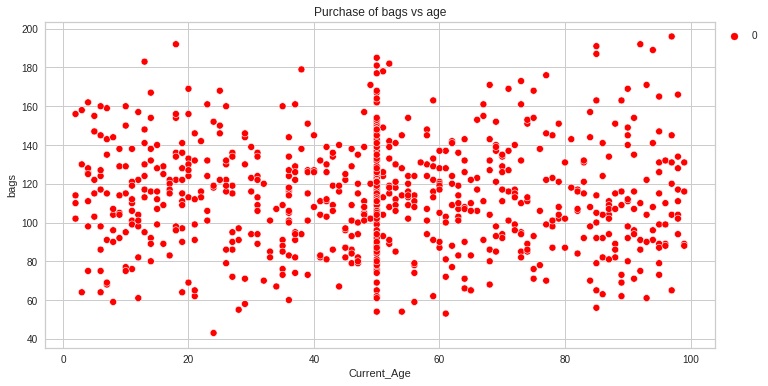

In [64]:
#Age against bag 
plt.figure(figsize=(12,6))
sns.scatterplot('Current_Age', 'bags', hue='cluster', data=customers, palette=['red']);
plt.title('Purchase of bags vs age');
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



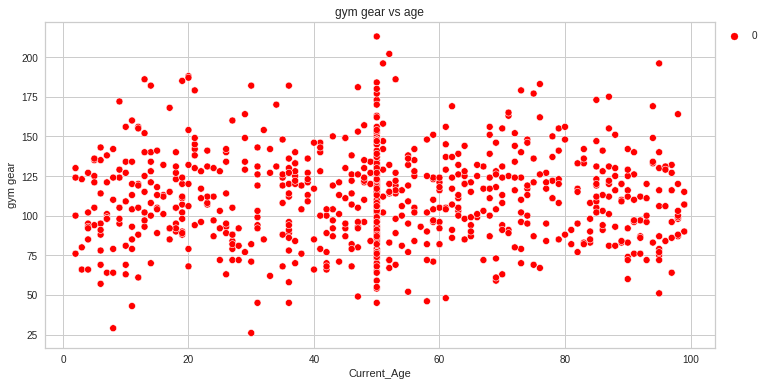

In [65]:
#Age against bag 
plt.figure(figsize=(12,6))
sns.scatterplot('Current_Age', 'gym gear', hue='cluster', data=customers, palette=['red']);
plt.title('gym gear vs age');
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left');

#10 clusterer

In [66]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='ward')

In [67]:
Z_hc=hc.fit_predict(cluster_df)

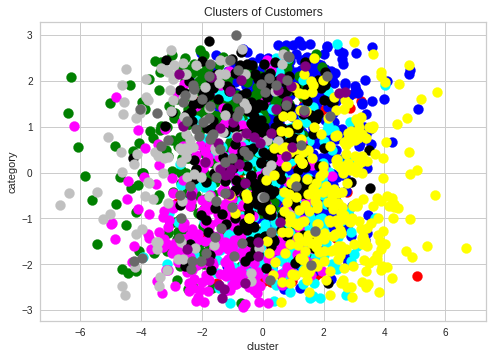

In [68]:
##5 Visualizing the clusters
plt.scatter(cluster_df[Z_hc==0, 0], cluster_df[Z_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(cluster_df[Z_hc==1, 0], cluster_df[Z_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(cluster_df[Z_hc==2, 0], cluster_df[Z_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(cluster_df[Z_hc==3, 0], cluster_df[Z_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(cluster_df[Z_hc==4, 0], cluster_df[Z_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(cluster_df[Z_hc==5, 0], cluster_df[Z_hc==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(cluster_df[Z_hc==6, 0], cluster_df[Z_hc==6, 1], s=100, c='silver', label ='Cluster 7')
plt.scatter(cluster_df[Z_hc==7, 0], cluster_df[Z_hc==7, 1], s=100, c='yellow', label ='Cluster 8')
plt.scatter(cluster_df[Z_hc==8, 0], cluster_df[Z_hc==8, 1], s=100, c='purple', label ='Cluster 9')
plt.scatter(cluster_df[Z_hc==9, 0], cluster_df[Z_hc==9, 1], s=100, c='dimgray', label ='Cluster 10')
plt.title('Clusters of Customers')
plt.xlabel('cluster')
plt.ylabel('category')
plt.show()

In [69]:
#Average of the 10 clusters
results_array = []
for i in range(10):
    results_array.append(data_df[Z_hc == i].astype(float).mean())

In [70]:
cluster_avg = pd.concat(results_array, axis=1).transpose()
cluster_avg .head(10)

,Customer_Id,Gender,Recency,Current_Age,Town,State,Hoodies,bags,bathrobe,blazer,blouse,boots,cap,cardigan,coat,dresses,gym gear,jean,pamajas,rubbers,sandals,shirt,shorts,sneaker,socks,suits,swim wear,online,showroom_0,showroom_1,showroom_10,showroom_11,showroom_12,showroom_13,showroom_14,showroom_15,showroom_16,showroom_17,showroom_18,showroom_19,showroom_2,showroom_20,showroom_3,showroom_4,showroom_5,showroom_6,showroom_7,showroom_8,showroom_9,customer,instagram,referral,twitter,referral_unknown,website,Customer_Ratings,Christi Himmelfahrt,Erster Mai,Erster Weihnachtstag,Karfreitag,Neujahr,Not_Holiday,Ostermontag,Pfingstmontag,Tag der Deutschen Einheit,Zweiter Weihnachtstag,cluster
0,963.926471,0.514706,42.235294,50.735294,208.176471,7.338235,103.250000,111.838235,112.661765,106.514706,114.485294,107.000000,111.794118,102.602941,106.470588,109.485294,116.529412,98.573529,107.529412,110.647059,105.176471,104.529412,116.500000,107.176471,102.588235,105.411765,112.558824,1142.382353,54.058824,54.470588,50.455882,52.588235,48.897059,46.794118,59.382353,53.367647,50.514706,53.823529,55.514706,59.117647,52.720588,54.720588,57.705882,51.602941,53.279412,56.073529,56.029412,53.014706,56.808824,385.367647,370.132353,386.823529,383.705882,376.411765,370.882353,2.985147,449.926471,550.000000,504.338235,2421.029412,2419.264706,265393.676471,788.897059,855.147059,727.573529,932.941176,0.0
1,1422.598726,0.524416,62.658174,50.356688,182.303609,6.845011,107.382166,104.970276,107.811040,107.490446,106.951168,104.806794,107.978769,109.764331,103.902335,110.443737,103.220807,106.713376,108.193206,106.925690,109.787686,103.740977,111.602972,109.309979,105.681529,105.927813,108.596603,1123.250531,56.333333,51.685775,54.384289,53.872611,54.842887,51.624204,53.089172,49.358811,51.084926,55.248408,53.626327,53.140127,54.375796,54.993631,53.859873,56.348195,54.855626,53.329087,50.915074,57.380042,53.602972,377.235669,375.545648,380.082803,377.808917,369.233546,371.295117,3.001507,686.592357,872.070064,688.089172,610.509554,688.184713,263328.312102,566.337580,746.581741,717.452229,692.133758,1.0
2,1350.359050,0.489614,59.451039,50.649852,184.136499,6.952522,113.807122,113.175074,115.451039,112.979228,112.142433,114.495549,111.955490,116.774481,114.732938,114.258160,115.436202,114.175074,120.557864,113.213650,113.409496,124.385757,113.178042,116.005935,117.112760,112.626113,119.029674,1203.637982,59.617211,57.222552,58.732938,58.379822,54.275964,58.679525,55.376855,54.759644,57.160237,58.718101,62.014837,55.237389,57.759644,57.747774,61.991098,55.581602,59.451039,58.599407,57.299703,60.296736,56.362018,404.744807,409.112760,398.640950,391.860534,409.436202,405.106825,2.990356,635.430267,847.329377,669.005935,778.264095,635.326409,283592.982196,734.094955,626.439169,672.908012,1178.278932,2.0
3,773.888535,0.547771,33.633758,49.493631,214.853503,6.691083,108.019108,110.818471,107.273885,111.789809,110.837580,106.216561,115.423567,106.678344,110.519108,109.207006,113.449045,109.506369,106.054140,111.038217,107.531847,109.585987,106.340764,108.751592,116.047771,106.773885,107.028662,1135.146497,55.541401,55.805732,55.996815,57.114650,54.140127,56.904459,57.031847,57.630573,58.977707,51.885350,58.732484,56.152866,52.859873,50.821656,51.773885,57.729299,54.878981,54.000000,57.248408,51.254777,57.264331,371.659236,384.363057,384.353503,381.041401,391.821656,385.652866,3.001688,723.535032,707.961783,760.191083,563.455414,641.942675,270019.331210,617.245223,820.414013,628.264331,801.178344,0.0
4,657.718213,0.443299,28.432990,52.000000,184.859107,7.470790,110.604811,116.587629,109.914089,117.501718,111.632302,120.824742,109.233677,113.512027,116.814433,111.890034,113.573883,115.185567,111.288660,117.333333,118.948454,110.745704,109.711340,115.237113,112.068729,117.474227,116.731959,1198.762887,56.340206,59.240550,57.615120,52.814433,57.845361,55.089347,58.532646,60.192440,59.309278,61.312715,55.907216,56.261168,58.130584,58.089347,58.103093,56.305842,55.302405,5